In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Defining constants and discretizing the system
h_bar = 1
m = 1
L = 1  # Box length (1 Bohr radius)
n = 2000
grid = np.linspace(-L / 2, L / 2, n)

In [53]:
#Constucting the Laplacian matrix

diagonal = -2 * np.ones(n) 
off_diagonal = np.ones(n-1) 
    

laplacian = (1/dx**2)*(np.diag(diagonal, k=0) + np.diag(off_diagonal, k=1) + np.diag(off_diagonal, k=-1))
        
print(laplacian)

[[-7992002.  3996001.        0. ...        0.        0.        0.]
 [ 3996001. -7992002.  3996001. ...        0.        0.        0.]
 [       0.  3996001. -7992002. ...        0.        0.        0.]
 ...
 [       0.        0.        0. ... -7992002.  3996001.        0.]
 [       0.        0.        0. ...  3996001. -7992002.  3996001.]
 [       0.        0.        0. ...        0.  3996001. -7992002.]]


In [54]:
#Constructing Hamiltonian Matrix
hamiltonian_matrix = -((h_bar**2) / (2 * m)) * laplacian
print(hamiltonian_matrix)

[[ 3996001.  -1998000.5       -0.  ...       -0.        -0.        -0. ]
 [-1998000.5  3996001.  -1998000.5 ...       -0.        -0.        -0. ]
 [      -0.  -1998000.5  3996001.  ...       -0.        -0.        -0. ]
 ...
 [      -0.        -0.        -0.  ...  3996001.  -1998000.5       -0. ]
 [      -0.        -0.        -0.  ... -1998000.5  3996001.  -1998000.5]
 [      -0.        -0.        -0.  ...       -0.  -1998000.5  3996001. ]]


In [58]:
#Solve for Eigenvalues and Eigenvectors, sorting eigenvalues and extracting first 7 energy levels
eigenvalues, eigenvectors = np.linalg.eigh(hamiltonian_matrix)

sort = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sort]

eigenvalues = eigenvalues[:7]
print("The first seven energy levels:")
print(eigenvalues)

The first seven energy levels:
[  4.92494145  19.69975365  44.32440018  78.79882035 123.12292919
 177.29661742 241.31975152]


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_63155/4150711745.py:9: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x,y, label=f"n= $\psi_{i+1}$")


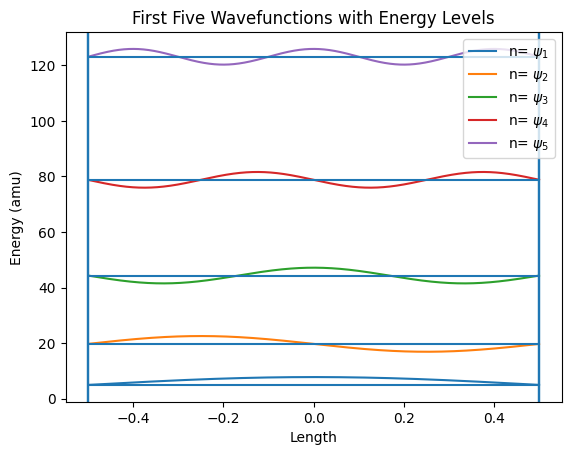

In [71]:
#Plotting the first 5 wavefunctions

x=grid
dx= (grid[1]-grid[0])                                                
for i in range(5):                               
    wavefunction= -eigenvectors[:, i]                                  
    wavefunction= wavefunction/(np.sqrt(np.sum(wavefunction**2)*dx))    #Normalize Wavefunction
    y=2*wavefunction+eigenvalues[i]                                     
    plt.plot(x,y, label=f"n= $\psi_{i+1}$")                               
    plt.axvline(x=L/2)                  
    plt.axvline(x=-L/2)
    plt.hlines(eigenvalues[i],-L/2, L/2)               
plt.title("First Five Wavefunctions with Energy Levels")
plt.xlabel("Length")
plt.ylabel("Energy (amu)")
plt.legend()
plt.show()